In [1]:
import re

# Leer el archivo con encoding latin-1
with open('proves_30_pixels.txt', 'r', encoding='latin-1') as file:
    content = file.read()

# Buscar todas las pruebas
proves_pattern = r'Prova: C = ([\d\.]+),  K = (\d+)[\s\S]*?Accuracy: ([\d\.]+)'
matches = re.findall(proves_pattern, content)

# Crear lista de listas
resultats = []
for match in matches:
    C = float(match[0])
    K = int(match[1])
    accuracy = float(match[2])
    resultats.append([C, K, accuracy])

#resultats

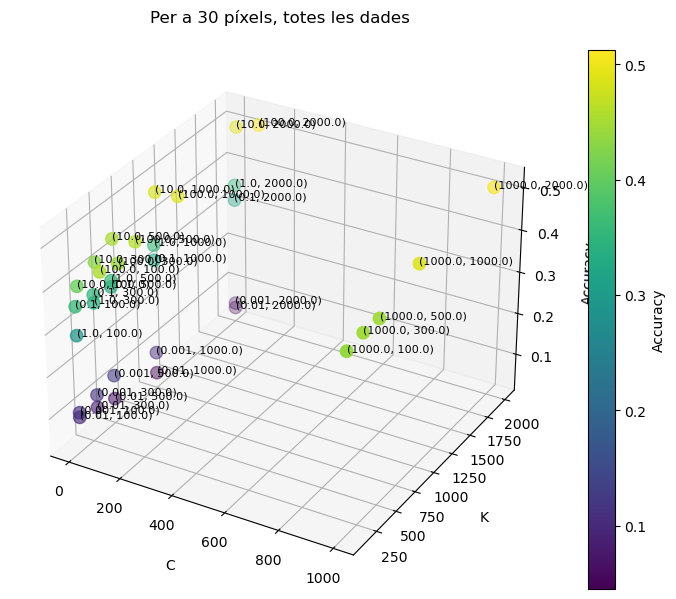

In [2]:

#TOTES LES DADES 3D

#%matplotlib qt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.array(resultats)


C = data[:,0]
K = data[:,1]
accuracy = data[:,2]

# Gràfic 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Color segons accuracy (+ colormap)
scatter = ax.scatter(C, K, accuracy, c=accuracy, cmap='viridis', s=80)

# Si vols log scale, pots activar-la:
# ax.set_xscale('log')

# Etiquetes
ax.set_xlabel("C", labelpad=10)
ax.set_ylabel("K", labelpad=10)
ax.set_zlabel("Accuracy", labelpad=10)
ax.set_title("Per a 30 píxels, totes les dades", pad=20)

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label("Accuracy")

for c, k, acc in zip(C, K, accuracy):
    label = f"({c}, {k})"
    ax.text(c, k, acc, label, fontsize=8)


plt.show()



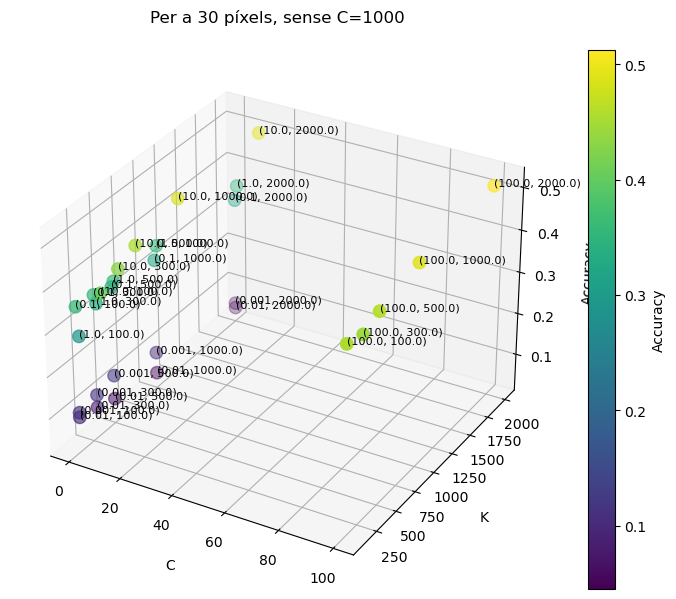

In [3]:
#SENSE EL C= 1000 PER VEURE ELS VALORS PETITS

#%matplotlib qt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.array(resultats)

# --- FILTRE: eliminar totes les files on C = 1000 ---
data = data[data[:,0] != 1000]

C = data[:,0]
K = data[:,1]
accuracy = data[:,2]

# Gràfic 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Color segons accuracy (+ colormap)
scatter = ax.scatter(C, K, accuracy, c=accuracy, cmap='viridis', s=80)

# Si vols log scale, pots activar-la:
# ax.set_xscale('log')

# Etiquetes
ax.set_xlabel("C", labelpad=10)
ax.set_ylabel("K", labelpad=10)
ax.set_zlabel("Accuracy", labelpad=10)
ax.set_title("Per a 30 píxels, sense C=1000 ", pad=20)

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label("Accuracy")

for c, k, acc in zip(C, K, accuracy):
    label = f"({c}, {k})"
    ax.text(c, k, acc, label, fontsize=8)


plt.show()



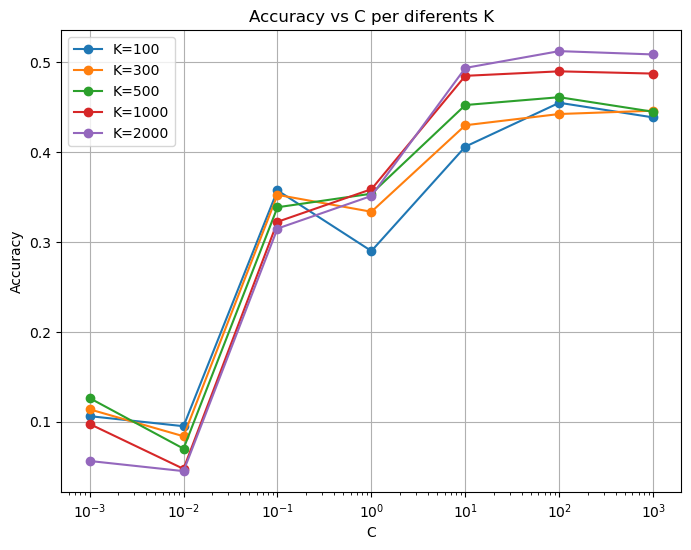

In [4]:
# Representació 2D: Accuracy vs C per diferents K

import matplotlib.pyplot as plt


# Extreure tots els K únics
Ks = sorted(set(row[1] for row in resultats))

plt.figure(figsize=(8,6))

for K in Ks:
    C_vals = [row[0] for row in resultats if row[1] == K]
    accuracy_vals = [row[2] for row in resultats if row[1] == K]
    plt.plot(C_vals, accuracy_vals, marker='o', label=f'K={K}')

plt.xscale('log')  # C varia molt, millor log
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C per diferents K')
plt.legend()
plt.grid(True)
plt.show()

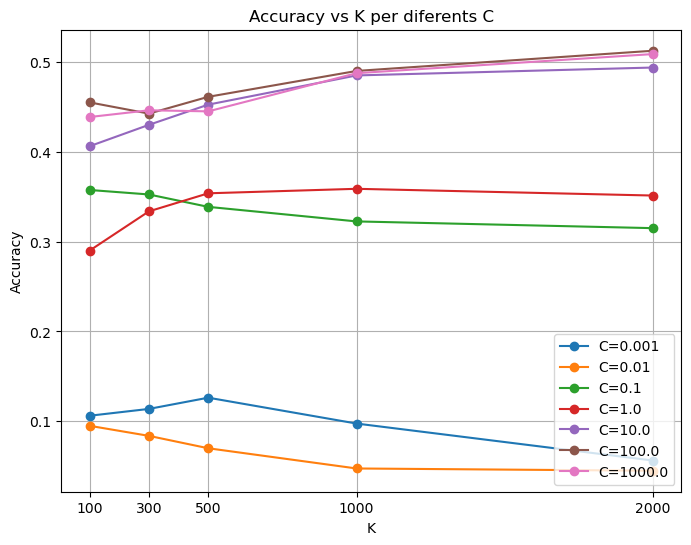

In [5]:
# Representació 2D: Accuracy vs K per diferents C

# Extreure tots els C únics
Cs = sorted(set(row[0] for row in resultats))

plt.figure(figsize=(8,6))

for C in Cs:
    K_vals = [row[1] for row in resultats if row[0] == C]
    accuracy_vals = [row[2] for row in resultats if row[0] == C]
    plt.plot(K_vals, accuracy_vals, marker='o', label=f'C={C}')

# Mostrar tots els K de manera explícita
plt.xticks(sorted(set(row[1] for row in resultats)))

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K per diferents C')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import re
from collections import defaultdict, Counter
import pandas as pd

# Leer el archivo
with open('proves_30_pixels.txt', 'r', encoding='latin-1') as file:
    content = file.read()

# Extraer todos los errores
error_pattern = r'ID: (\d+)  --> Real: ([^,]+),  Pred: ([^\n]+)'
errors = re.findall(error_pattern, content)

# Crear diccionario para contar errores entre clases
error_counts = defaultdict(Counter)
total_errores_por_clase_real = Counter()

# Contar errores
for _, real, pred in errors:
    error_counts[real][pred] += 1
    total_errores_por_clase_real[real] += 1

# Obtener todas las clases únicas (reales y predichas)
clases_reales = sorted(total_errores_por_clase_real.keys())
clases_predichas = set()
for counter in error_counts.values():
    clases_predichas.update(counter.keys())
clases_predichas = sorted(clases_predichas)

print("TABLA 2D DE PORCENTAJES DE ERROR (solo errores)")
print("=" * 80)
print("\nFilas: Clase Real | Columnas: Clase Predicha (erróneamente)")
print("\nCada celda muestra: porcentaje respecto a los errores totales de esa clase real")
print("-" * 80)

# Crear matriz de porcentajes
matriz_porcentajes = []
matriz_numeros = []

for clase_real in clases_reales:
    fila_porcentajes = []
    fila_numeros = []
    total_errores_clase = total_errores_por_clase_real[clase_real]
    
    for clase_pred in clases_predichas:
        if clase_real == clase_pred:
            # No mostramos aciertos, solo errores
            fila_porcentajes.append("-")
            fila_numeros.append("0")
        else:
            count = error_counts[clase_real][clase_pred]
            if count > 0:
                porcentaje = (count / total_errores_clase) * 100
                fila_porcentajes.append(f"{porcentaje:.1f}%")
                fila_numeros.append(str(count))
            else:
                fila_porcentajes.append("0%")
                fila_numeros.append("0")
    
    matriz_porcentajes.append(fila_porcentajes)
    matriz_numeros.append(fila_numeros)

# Calcular anchos
ancho_clase_real = max(len(cr) for cr in clases_reales) + 2
ancho_columna = 20  # Ancho fijo para cada columna

# Imprimir tabla de porcentajes
print(f"\n📊 TABLA DE PORCENTAJES (%):")
print(f"\n{' ' * ancho_clase_real}", end="")
for clase_pred in clases_predichas:
    print(f"{clase_pred[:ancho_columna-2]:^{ancho_columna}}", end="")
print()

print("-" * (ancho_clase_real + len(clases_predichas) * ancho_columna))

for i, clase_real in enumerate(clases_reales):
    print(f"{clase_real:{ancho_clase_real}}", end="")
    for j, clase_pred in enumerate(clases_predichas):
        print(f"{matriz_porcentajes[i][j]:^{ancho_columna}}", end="")
    print(f"  Total: {total_errores_por_clase_real[clase_real]} errores")



TABLA 2D DE PORCENTAJES DE ERROR (solo errores)

Filas: Clase Real | Columnas: Clase Predicha (erróneamente)

Cada celda muestra: porcentaje respecto a los errores totales de esa clase real
--------------------------------------------------------------------------------

📊 TABLA DE PORCENTAJES (%):

                       ARROS I CEREALS            PA           PLATS AMB PANEER    PLATS AMB PATATA   PLATS AMB POLLASTR   PLATS DE LLEGUMS   PLATS DE VERDURES     POSTRES DOLCOS    REGIONALS DIVERSOS 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ARROS I CEREALS               -                 27.5%               10.5%                4.2%                5.9%                6.5%                2.7%               37.6%                5.0%          Total: 476 errores
PA                          16.7%                 -                 11.3%

In [7]:
# Tabla con números absolutos
print(f"\n\n🔢 TABLA DE NÚMEROS ABSOLUTOS:")
print(f"\n{' ' * ancho_clase_real}", end="")
for clase_pred in clases_predichas:
    print(f"{clase_pred[:ancho_columna-2]:^{ancho_columna}}", end="")
print()

print("-" * (ancho_clase_real + len(clases_predichas) * ancho_columna))

for i, clase_real in enumerate(clases_reales):
    print(f"{clase_real:{ancho_clase_real}}", end="")
    for j, clase_pred in enumerate(clases_predichas):
        print(f"{matriz_numeros[i][j]:^{ancho_columna}}", end="")
    print(f"  Total: {total_errores_por_clase_real[clase_real]}")



🔢 TABLA DE NÚMEROS ABSOLUTOS:

                       ARROS I CEREALS            PA           PLATS AMB PANEER    PLATS AMB PATATA   PLATS AMB POLLASTR   PLATS DE LLEGUMS   PLATS DE VERDURES     POSTRES DOLCOS    REGIONALS DIVERSOS 
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
ARROS I CEREALS               0                  131                  50                  20                  28                  31                  13                 179                  24           Total: 476
PA                           196                  0                  133                  27                  64                  61                  7                  623                  64           Total: 1175
PLATS AMB PANEER             166                  55                  0                   73                 103                  56  